# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [21]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#Carregando a base de dados
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
#Deixando apenas as colunas númericas
df_numerico = df.select_dtypes(include=['number'])
df_numerico = df_numerico.drop('index', axis=1)
df_numerico.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


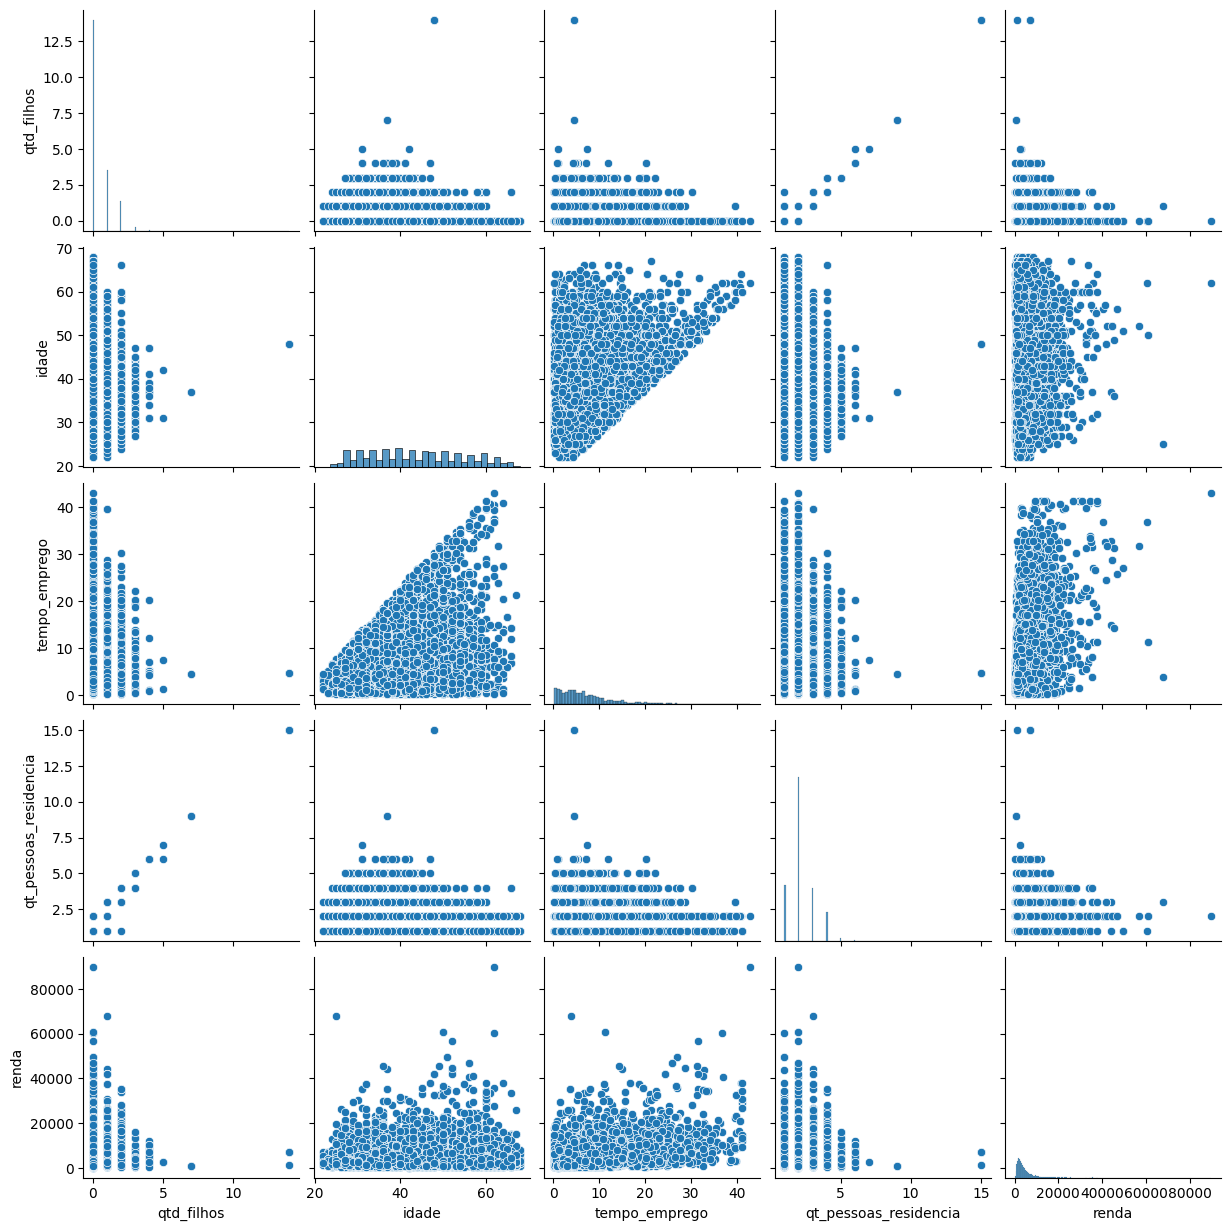

In [23]:
#visualizando alguns gráficos para entender o comportamento das variaveis umas com as outras
sns.pairplot(df_numerico)

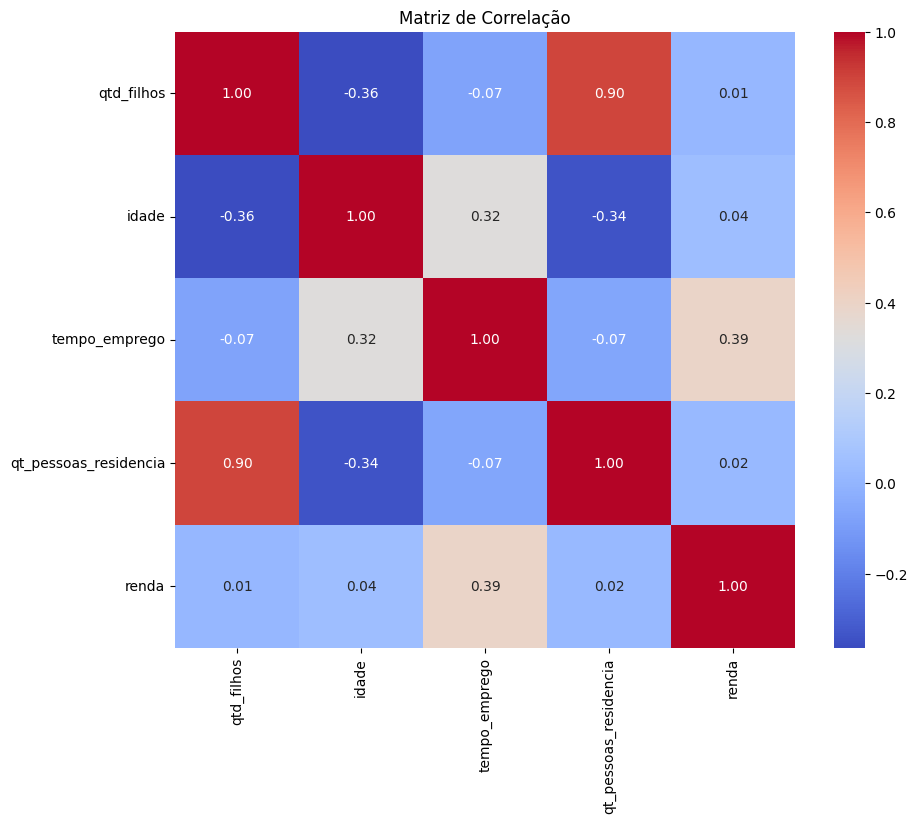

In [5]:
#Criando um mapa de calor para a matriz de correlação
corr_matriz = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Padrões que fazem sentido nesta análise:

*   Quantidade de filhos tem correlação forte com quantidade de pessoas na casa
*   Tempo de emprego tem boa correlação com a renda
*   renda não possui correlação com quantidade de filhos, idade e quantidade de pessoas por residência
*   Boa correlação entre idade e pessoas na residência
*   idade tem uma boa correlação com quantidade de filhos








2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

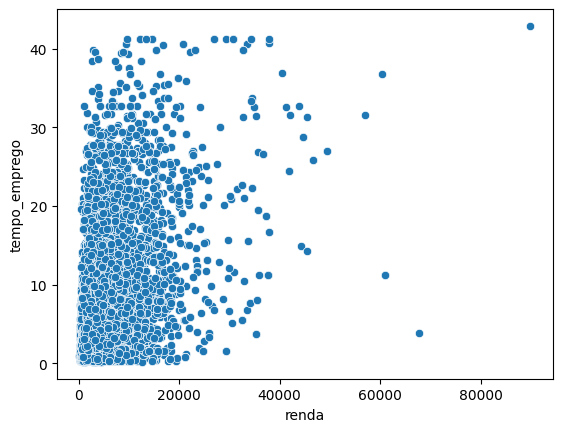

In [7]:
#Plotando o gráfico de variaveis númericas com maior correlação com renda; Renda x tempo_emprego
sns.scatterplot(data=df_numerico, x='renda', y='tempo_emprego')

<Axes: xlabel='renda', ylabel='idade'>

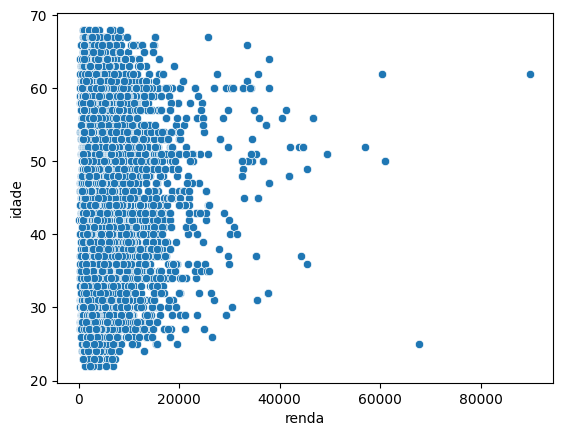

In [9]:
#Realizando a análise para a segunda variável mais correlacionada dentre as numéricas; renda x idade
sns.scatterplot(data=df_numerico, x='renda', y='idade')

3) Na su aopinião, há outliers na variável renda?

Após analisar os dados e gráficos gerados na questão anterios, podemos dizer que sim, existem outliers na variavel renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='idade', ylabel='log_renda'>

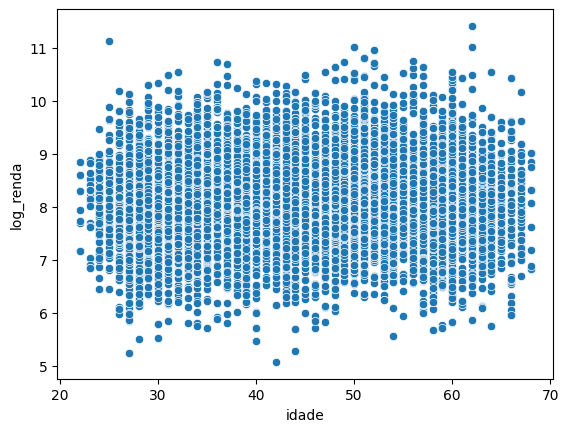

In [11]:
#Analise de idade por log de renda
df_log = df.copy()
df_log['log_renda'] = np.log(df['renda'])

sns.scatterplot(data=df_log, x='idade', y='log_renda')

<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

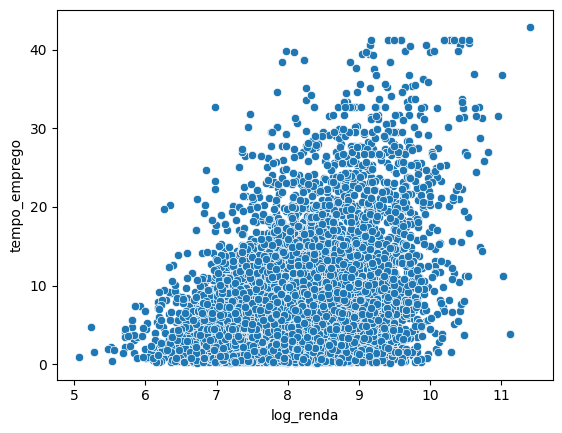

In [13]:
#analise do tempo de emprego pelo log de renda
sns.scatterplot(data=df_log, x='log_renda', y='tempo_emprego')

<Axes: >

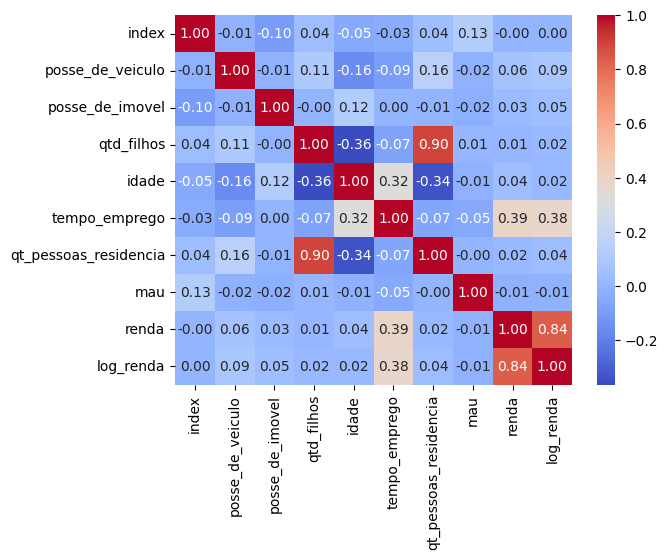

In [20]:
#Criando heatmap para localizar a variavel com a maior correlação de log_renda
sns.heatmap(df_log.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Apesar dos outliers ainda existirem, a aplicação de log na variável renda surtiu um efeito positivo, diminuindo a quantidade de outliers, a analise que teve um efeito melhor foi a de tempo de emprego pelo log de renda que foi de 0.38